# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [1]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

C:\Users\ninaw\AppData\Local\Temp\ipykernel_20740\24725939.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [2]:
# Getting rid of irrelevant columns
df = df.drop(columns=["WaterworksName"])
df.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.0,6.000000,5200.0,10.0,Time,NaN,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.0,4.908739,300.0,28.0,Volume,310.0,0.8,5.0,15.217089,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.0,15.343900,3800.0,83.3,Volume,190.0,2.0,35.0,28.970630,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.0,26.0,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.0,4.5,Volume,NaN,1.6,32.0,NaN,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710


In [3]:
#We are calculating the percentage of missing values for each column

for col in df.columns:
    nan_percentage = df[col].isna().mean() * 100
    if nan_percentage > 0:
        print(col, nan_percentage)

MaxTypicalFlow 20.253164556962027
AverageFilterArea 5.063291139240507
AverageTypicalRunVolume 2.5316455696202533
AverageBackwashVolume 12.658227848101266
AverageTotalFilterDepth 41.77215189873418
OverallFilterGrainSizeMin 43.037974683544306
OverallFilterGrainSizeMax 43.037974683544306
AverageFilterBedVolume 43.037974683544306
FilterExploitation 20.253164556962027
Stage1HLR 26.582278481012654
TotalEBCT 49.36708860759494
Footprint 5.063291139240507
SumOfld_layer 49.36708860759494
UniformityCoefficient 64.55696202531645
UFRV 8.860759493670885
BW% 16.455696202531644
HLR_BW 34.177215189873415
TankCapacity 5.063291139240507
TankExploitation 37.9746835443038


In [4]:
#We are dropping columns with more than 40% missing values
for col in df.columns:
    nan_percentage = df[col].isna().mean() * 100
    if nan_percentage > 40:
        df = df.drop(columns=col)

df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [5]:
#We are using one-hot encoding to transform the 'PrimaryTrigger' and other categorical columns into multiple columns

# Get unique values from 'PrimaryTrigger' column
unique_values = df['PrimaryTrigger'].unique()

# Iterate over unique values and create new columns
for value in unique_values:
    # Dynamically create new column name
    new_col_name = f"{value.replace(' ', '')}PrimaryTrigger"
    # Initialize new column with 0s
    df[new_col_name] = 0
    # Set value to 1 where 'PrimaryTrigger' matches the current value
    df.loc[df['PrimaryTrigger'] == value, new_col_name] = 1

# Drop the original 'PrimaryTrigger' column
df = df.drop(columns=["PrimaryTrigger"])

df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,...,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume,TimePrimaryTrigger,VolumePrimaryTrigger,WaterlevelabovefilterPrimaryTrigger,MixPrimaryTrigger
0,6,50.00,6.000000,5200.00000,10.00,57.886530,Cascade,1.880000,1.388889,143.341204,...,NaN,27.294778,NaN,Gravity,Single,253543,1,0,0,0
1,4,110.00,4.908739,300.00000,28.00,63.521586,Air injection,1.620000,11.204508,16.714412,...,30.557749,2.576075,NaN,Pressure,Double,612094,0,1,0,0
2,4,120.00,15.343900,3800.00000,83.30,64.908486,Bottom aeration,2.213333,3.935020,44.693822,...,32.791831,21.825600,NaN,Gravity,Double,682318,0,1,0,0
3,2,NaN,16.000000,1200.00000,26.00,NaN,Cascade,2.073333,NaN,194.588021,...,NaN,12.554300,NaN,Gravity,Single,156998,0,1,0,0
4,2,NaN,1.495000,250.00000,4.50,NaN,Cascade,1.313333,NaN,412.300024,...,NaN,52.220566,NaN,Gravity,Single,6710,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,91.698648,Cascade,1.546667,5.242647,24.106636,...,NaN,9.176959,39.682540,Gravity,Double,11454775,0,0,0,1
75,20,1407.29,10.178760,4500.00000,57.00,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,...,51.086775,6.040393,NaN,Pressure,Single,11021800,0,1,0,0
76,6,250.00,14.752500,2331.50137,51.57,19.331598,Bottom aeration,1.673333,2.824380,209.076387,...,30.367735,22.367525,45.833333,Gravity,Single,423362,1,0,0,0
77,12,NaN,37.437401,4400.00000,134.00,NaN,Cascade,2.200000,NaN,152.513970,...,32.053507,NaN,NaN,Gravity,Double,1521895,0,1,0,0


In [6]:
# Get unique values from 'AerationType' column
unique_values = df['AerationType'].unique()

# Iterate over unique values and create new columns
for value in unique_values:
    # Dynamically create new column name
    new_col_name = f"{value.replace(' ', '')}AerationType"
    # Initialize new column with 0s
    df[new_col_name] = 0
    # Set value to 1 where 'AerationType' matches the current value
    df.loc[df['AerationType'] == value, new_col_name] = 1

# Drop the original 'AerationType' column
df = df.drop(columns=["AerationType"])

df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,WaterlevelabovefilterPrimaryTrigger,MixPrimaryTrigger,CascadeAerationType,AirinjectionAerationType,BottomaerationAerationType,PureoxygeninjectionAerationType,PassiveplateaeratorAerationType,NoprimaryaerationAerationType,OtherAerationType,InkaAerationType
0,6,50.00,6.000000,5200.00000,10.00,57.886530,1.880000,1.388889,143.341204,866.666667,...,0,0,1,0,0,0,0,0,0,0
1,4,110.00,4.908739,300.00000,28.00,63.521586,1.620000,11.204508,16.714412,40.743665,...,0,0,0,1,0,0,0,0,0,0
2,4,120.00,15.343900,3800.00000,83.30,64.908486,2.213333,3.935020,44.693822,249.217919,...,0,0,0,0,1,0,0,0,0,0
3,2,NaN,16.000000,1200.00000,26.00,NaN,2.073333,NaN,194.588021,75.000000,...,0,0,1,0,0,0,0,0,0,0
4,2,NaN,1.495000,250.00000,4.50,NaN,1.313333,NaN,412.300024,167.224093,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,91.698648,1.546667,5.242647,24.106636,NaN,...,0,1,1,0,0,0,0,0,0,0
75,20,1407.29,10.178760,4500.00000,57.00,89.405620,2.133333,6.912876,22.050800,442.097088,...,0,0,0,0,0,0,1,0,0,0
76,6,250.00,14.752500,2331.50137,51.57,19.331598,1.673333,2.824380,209.076387,158.041107,...,0,0,0,0,1,0,0,0,0,0
77,12,NaN,37.437401,4400.00000,134.00,NaN,2.200000,NaN,152.513970,93.489396,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# Get unique values from 'GravityPressureMixed' column
unique_values = df['GravityPressureMixed'].unique()

# Iterate over unique values and create new columns
for value in unique_values:
    # Dynamically create new column name
    new_col_name = f"{value.replace(' ', '')}GravityPressureMixed"
    # Initialize new column with 0s
    df[new_col_name] = 0
    # Set value to 1 where 'GravityPressureMixed' matches the current value
    df.loc[df['GravityPressureMixed'] == value, new_col_name] = 1

# Drop the original 'GravityPressureMixed' column
df = df.drop(columns=["GravityPressureMixed"])

df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,AirinjectionAerationType,BottomaerationAerationType,PureoxygeninjectionAerationType,PassiveplateaeratorAerationType,NoprimaryaerationAerationType,OtherAerationType,InkaAerationType,GravityGravityPressureMixed,PressureGravityPressureMixed,MixedGravityPressureMixed
0,6,50.00,6.000000,5200.00000,10.00,57.886530,1.880000,1.388889,143.341204,866.666667,...,0,0,0,0,0,0,0,1,0,0
1,4,110.00,4.908739,300.00000,28.00,63.521586,1.620000,11.204508,16.714412,40.743665,...,1,0,0,0,0,0,0,0,1,0
2,4,120.00,15.343900,3800.00000,83.30,64.908486,2.213333,3.935020,44.693822,249.217919,...,0,1,0,0,0,0,0,1,0,0
3,2,NaN,16.000000,1200.00000,26.00,NaN,2.073333,NaN,194.588021,75.000000,...,0,0,0,0,0,0,0,1,0,0
4,2,NaN,1.495000,250.00000,4.50,NaN,1.313333,NaN,412.300024,167.224093,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,91.698648,1.546667,5.242647,24.106636,NaN,...,0,0,0,0,0,0,0,1,0,0
75,20,1407.29,10.178760,4500.00000,57.00,89.405620,2.133333,6.912876,22.050800,442.097088,...,0,0,0,1,0,0,0,0,1,0
76,6,250.00,14.752500,2331.50137,51.57,19.331598,1.673333,2.824380,209.076387,158.041107,...,0,1,0,0,0,0,0,1,0,0
77,12,NaN,37.437401,4400.00000,134.00,NaN,2.200000,NaN,152.513970,93.489396,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Use label encoding to transform 'Stages' column
# We iterate over the unique values and assign a number to each of them
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.DataFrame(df)

label_encoder = LabelEncoder()
df["Stages"] = label_encoder.fit_transform(df['Stages'])
neighbourhoods_num = df['Stages'].unique()
df["Stages"]

0     2
1     0
2     0
3     2
4     2
     ..
74    0
75    2
76    2
77    0
78    2
Name: Stages, Length: 79, dtype: int32

In [9]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors

#Imputing using kNN

# Initialize the KNNImputer
k = 3  # Number of neighbors
imputer = KNNImputer(n_neighbors=k)

# Fit and transform the DataFrame
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,AirinjectionAerationType,BottomaerationAerationType,PureoxygeninjectionAerationType,PassiveplateaeratorAerationType,NoprimaryaerationAerationType,OtherAerationType,InkaAerationType,GravityGravityPressureMixed,PressureGravityPressureMixed,MixedGravityPressureMixed
0,6.0,50.000000,6.000000,5200.00000,10.00,57.886530,1.880000,1.388889,143.341204,866.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.0,110.000000,4.908739,300.00000,28.00,63.521586,1.620000,11.204508,16.714412,40.743665,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,120.000000,15.343900,3800.00000,83.30,64.908486,2.213333,3.935020,44.693822,249.217919,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,30.533333,16.000000,1200.00000,26.00,57.042154,2.073333,5.097971,194.588021,75.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,19.166667,1.495000,250.00000,4.50,42.732256,1.313333,3.218834,412.300024,167.224093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16.0,1426.000000,47.940002,18500.00000,110.00,91.698648,1.546667,5.242647,24.106636,374.922978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75,20.0,1407.290000,10.178760,4500.00000,57.00,89.405620,2.133333,6.912876,22.050800,442.097088,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
76,6.0,250.000000,14.752500,2331.50137,51.57,19.331598,1.673333,2.824380,209.076387,158.041107,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77,12.0,300.100000,37.437401,4400.00000,134.00,55.654341,2.200000,2.686514,152.513970,93.489396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
#Scaler
#Transforming all the values to be normally distributed
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)



#Adding 3 to all values to make them positive as the range of the values is from -3 to 3
df = df + 3
df.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,AirinjectionAerationType,BottomaerationAerationType,PureoxygeninjectionAerationType,PassiveplateaeratorAerationType,NoprimaryaerationAerationType,OtherAerationType,InkaAerationType,GravityGravityPressureMixed,PressureGravityPressureMixed,MixedGravityPressureMixed
0,2.937030,2.416807,2.335792,2.998750,2.182501,2.893810,2.904792,2.058417,3.909404,5.830151,...,2.576793,2.259041,2.713309,2.76906,2.886772,2.886772,2.886772,3.720577,2.319586,2.838835
1,2.439569,2.655190,2.209218,2.447021,2.713060,3.155338,1.872283,4.665161,2.166643,1.595368,...,5.362908,2.259041,2.713309,2.76906,2.886772,2.886772,2.886772,1.612223,4.469694,2.838835
2,2.439569,2.694921,3.419580,2.841113,4.343052,3.219705,4.228522,2.734595,2.551723,2.664285,...,2.576793,4.349603,2.713309,2.76906,2.886772,2.886772,2.886772,3.720577,2.319586,2.838835
3,1.942109,2.339465,3.495680,2.548359,2.654109,2.854622,3.672555,3.043442,4.614712,1.771011,...,2.576793,2.259041,2.713309,2.76906,2.886772,2.886772,2.886772,3.720577,2.319586,2.838835
4,1.942109,2.294305,1.813262,2.441391,2.020386,2.190488,0.654452,2.544397,7.611076,2.243875,...,2.576793,2.259041,2.713309,2.76906,2.886772,2.886772,2.886772,3.720577,2.319586,2.838835


Correlation Matrix:
                                     TotalFilters  MaxTypicalFlow  \
TotalFilters                             1.000000        0.686418   
MaxTypicalFlow                           0.686418        1.000000   
AverageFilterArea                        0.475304        0.539842   
AverageTypicalRunVolume                  0.265921        0.254333   
AverageBackwashVolume                    0.385612        0.449579   
FilterExploitation                       0.380541        0.145112   
OxygenFactor                            -0.010480       -0.066351   
Stage1HLR                               -0.255623       -0.015331   
Footprint                               -0.063271       -0.178370   
UFRV                                    -0.020519        0.000739   
BW%                                      0.096600       -0.025254   
HLR_BW                                   0.283173        0.374533   
TankCapacity                            -0.164286       -0.255847   
TankExploitati

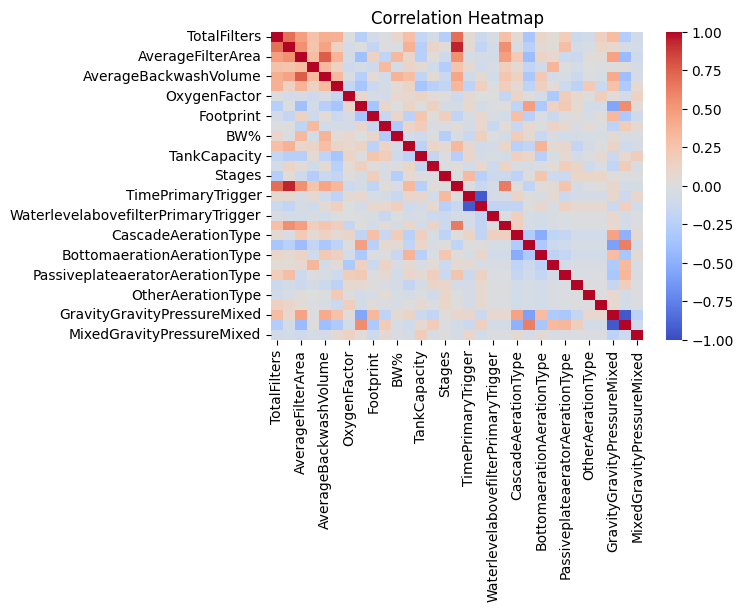

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Find the column pairs with the highest correlation

corr_matrix = df.corr()

max_corr = corr_matrix.unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr != 1]

# Keep only one pair (e.g., 'A' and 'B')
columns_to_drop = max_corr.index[0][1]  # Extract the second column in the pair

# Create a new DataFrame without the redundant column
max_corr = max_corr.drop(index=columns_to_drop)  # Drop the corresponding row (pair)

# Extract the name of the redundant column
redundant_column = columns_to_drop[1]

# Display the redundant column name
print(redundant_column)

max_corr

a


C:\Users\ninaw\AppData\Local\Temp\ipykernel_20740\3337939759.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  max_corr = max_corr.drop(index=columns_to_drop)  # Drop the corresponding row (pair)


AbstractedVolume              MaxTypicalFlow                  0.942925
AverageBackwashVolume         AverageFilterArea               0.763992
AverageFilterArea             AverageBackwashVolume           0.763992
AbstractedVolume              TotalFilters                    0.693008
TotalFilters                  AbstractedVolume                0.693008
                                                                ...   
GravityGravityPressureMixed   AirinjectionAerationType       -0.587318
VolumePrimaryTrigger          TimePrimaryTrigger             -0.935202
TimePrimaryTrigger            VolumePrimaryTrigger           -0.935202
PressureGravityPressureMixed  GravityGravityPressureMixed    -0.944263
GravityGravityPressureMixed   PressureGravityPressureMixed   -0.944263
Length: 900, dtype: float64

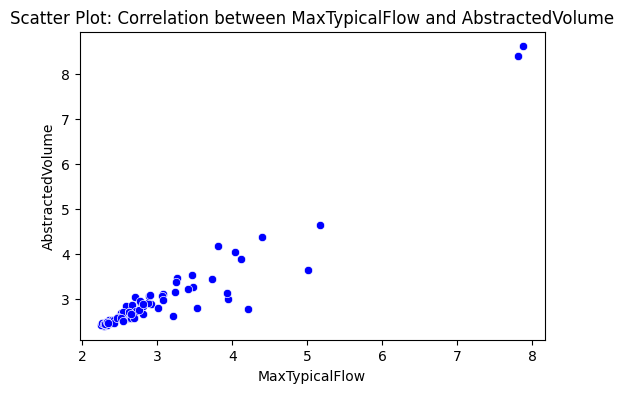

In [13]:
# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='MaxTypicalFlow', y='AbstractedVolume', color='blue')
plt.title('Scatter Plot: Correlation between MaxTypicalFlow and AbstractedVolume')
plt.xlabel('MaxTypicalFlow')
plt.ylabel('AbstractedVolume')
plt.show()

In [14]:
from scipy.stats import skew, boxcox

# Assuming df is your DataFrame with numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Calculate skewness for each numerical feature
skewness = df[numerical_columns].apply(lambda x: skew(x))

# Set a threshold for skewness (adjust as needed)
skewness_threshold = 0.5

# Apply transformations based on skewness
for feature in numerical_columns:
    if skewness[feature] > skewness_threshold:
        # Log transformation
        print("Logging feature: ", feature)
        df[feature] = np.log1p(df[feature])
    elif skewness[feature] < -skewness_threshold:
        # Square root transformation
        print("Squaring feature: ", feature)
        df[feature] = np.sqrt(df[feature])
    else:
        print("Already symmetrical: ", feature)


# Display the transformed DataFrame
print(df)

Logging feature:  TotalFilters
Logging feature:  MaxTypicalFlow
Logging feature:  AverageFilterArea
Logging feature:  AverageTypicalRunVolume
Logging feature:  AverageBackwashVolume
Already symmetrical:  FilterExploitation
Squaring feature:  OxygenFactor
Logging feature:  Stage1HLR
Logging feature:  Footprint
Logging feature:  UFRV
Logging feature:  BW%
Already symmetrical:  HLR_BW
Logging feature:  TankCapacity
Logging feature:  TankExploitation
Already symmetrical:  Stages
Logging feature:  AbstractedVolume
Logging feature:  TimePrimaryTrigger
Squaring feature:  VolumePrimaryTrigger
Logging feature:  WaterlevelabovefilterPrimaryTrigger
Logging feature:  MixPrimaryTrigger
Logging feature:  CascadeAerationType
Logging feature:  AirinjectionAerationType
Logging feature:  BottomaerationAerationType
Logging feature:  PureoxygeninjectionAerationType
Logging feature:  PassiveplateaeratorAerationType
Logging feature:  NoprimaryaerationAerationType
Logging feature:  OtherAerationType
Logging 

c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


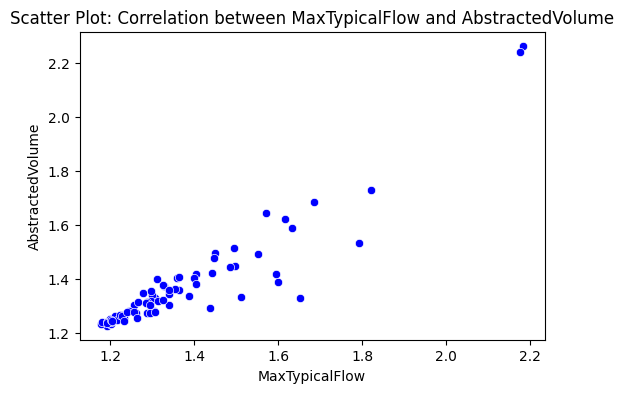

In [15]:
# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='MaxTypicalFlow', y='AbstractedVolume', color='blue')
plt.title('Scatter Plot: Correlation between MaxTypicalFlow and AbstractedVolume')
plt.xlabel('MaxTypicalFlow')
plt.ylabel('AbstractedVolume')
plt.show()

In [16]:
#Consequences:


#High Variability: 
#Small datasets are more prone to variability or noise, making it difficult for models to distinguish between signal and noise. 
#This can result in models that are less robust and have higher variance.
#Limited Representation: 
#Small datasets may not adequately represent the full variability of the underlying population or distribution. 
#This can lead to biased or skewed models that do not generalize well to new data.
#Risk of Model Complexity: 
#With limited data, there's a temptation to use complex models to try to fit the data better. 
#However, complex models are more likely to overfit, especially with small datasets.


In [17]:
#After the data preprocessing, the dataset is ready for data analysis and model building, and we deem the data clean.